# Apéndice funciones Python

##### luiocahoe

##### 6 de mayo de 2024

### Interpolacion Lagrange

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns

class InterpolacionLagrange:
    def __init__(self, xi, fi):
        self.xi = xi
        self.fi = fi
        self.divisorL = np.zeros(len(xi), dtype=float)
        self.polinomio = None
        self.polinomio_simplificado = None

    def calcular_polinomio(self):
        n = len(self.xi)
        x = sym.Symbol("x")
        polinomio = 0
        
        for i in range(0, n, 1):
            numerador = 1
            denominador = 1
            for j in range(0, n, 1):
                if (j != i):
                    numerador *= (x - self.xi[j])
                    denominador *= (self.xi[i] - self.xi[j])
            terminoLi = numerador / denominador
            polinomio += terminoLi * self.fi[i]
            self.divisorL[i] = denominador

        self.polinomio = polinomio
        self.polinomio_simplificado = polinomio.expand()

    def graficar(self):
        if self.polinomio is None:
            self.calcular_polinomio()

        x = sym.Symbol("x")
        px = sym.lambdify(x, self.polinomio_simplificado)

        muestras = 200
        a = np.min(self.xi)
        b = np.max(self.xi)
        pxi = np.linspace(a, b, muestras)
        pfi = px(pxi)
        plt.figure(figsize=(8, 5))
        plt.plot(self.xi, self.fi, "o", label="Puntos")
        plt.plot(pxi, pfi, label="Polinomio", linestyle="--")
        plt.legend()
        plt.xlabel("$x$")
        plt.ylabel("$P_n (x)$")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def mostrar_polinomio(self):
        if self.polinomio is None:
            self.calcular_polinomio()

        print("Valores de fi: ", self.fi)
        print("Divisores en L(i): ", self.divisorL)
        print()
        print("Polinomio de Lagrange, expresiones:")
        print(self.polinomio)
        print()
        print("Polinomio de Lagrange: ")
        print(self.polinomio_simplificado)
    
    def imprimir_polinomio(self):
        ancho_max=70
        polinomio=self.polinomio_simplificado
        polinomio_string=polinomio.__str__()
        componentes = polinomio_string.split()
        lineas = []
        linea_actual = componentes[0]
        for componente in componentes[1:]:
            if len(linea_actual) + 1 + len(componente) <= ancho_max:
                linea_actual += " " + componente
            else:
                lineas.append(linea_actual)
                linea_actual = componente
        lineas.append(linea_actual)
        return print("\n".join(lineas))

Ejemplo de uso:

In [3]:
xi = np.array([0, 0.2, 0.3, 0.4, 0.6])
fi = np.array([1, 1.6, 1.7, 2.0, 3])
lagrange = InterpolacionLagrange(xi, fi)

Para que calcule el polinomio debemos usar el método
`calcular_polinomio`:

In [4]:
lagrange.calcular_polinomio()

Y para obtener el polinomio `imprimir_polinomio`:

In [5]:
lagrange.imprimir_polinomio()

-83.3333333333335*x**4 + 116.666666666667*x**3 - 49.1666666666667*x**2
+ 8.83333333333334*x + 1.0


Para que nos muestre el gráfico donde aparece tanto el polinomio de
lagrange como los puntos usados debemos usar el método `graficar`:

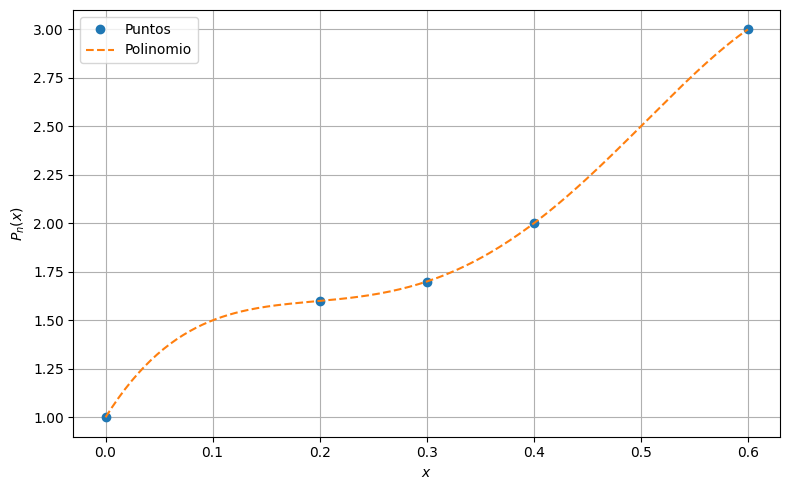

In [6]:
lagrange.graficar()

### Cota error

In [7]:
import numpy as np
from scipy.optimize import fminbound
from sympy import symbols, diff, factorial, lambdify

def acotar_error(f, n, a, b):
    # Obtener n puntos equiespaciados en el intervalo (a, b)
    puntos = np.linspace(a, b, n)
    
    # Crear el símbolo x
    x = symbols("x")
    
    # Calcular el productorio de (x - x_i) y convertilo en funcion
    producto = 1
    for punto in puntos:
        producto *= (x - punto)
    
    producto_func = lambdify(x, producto, modules="numpy")
    
    # Encontrar el máximo del valor absoluto del productorio en el intervalo (a, b)
    resultado_maximo_productorio=fminbound(lambda x: -abs(producto_func(x)), a, b)
    valor_absoluto_productorio=abs(producto_func(resultado_maximo_productorio))

    # Encontrar el máximo del valor absoluto de la derivada de orden n de f en (a,b)
    derivada_n = diff(f(x), x,n)
    derivada_n_func = lambdify(x, derivada_n)
    resultado_maximo_f=fminbound(lambda x: -abs(derivada_n_func(x)), a, b)
    valor_absoluto_f=abs(derivada_n_func(resultado_maximo_f))

    # Calcular el factorial
    factorial_n = factorial(n)

    cota_error= (valor_absoluto_productorio/factorial_n)*valor_absoluto_f

    return cota_error

Ejemplo de uso:

In [8]:
from sympy import sin, pi
def f(x):
    return sin(x)
import np
error_acotado=acotar_error(f, 2, 0, np.pi/2)
print("El error de interpolación es inferior a:", error_acotado)

El error de interpolación es inferior a: 0.308425137528880


### Interpolación Neville

In [12]:
def interpolacion_neville(x, y, objetivo):
    n = len(x)
    Q = []
    for _ in range(n):
      fila = [0] * n
      Q.append(fila)
    for i in range(n):
        Q[i][0] = y[i]
    for i in range(1, n):
        for j in range(1, i + 1):
            Q[i][j] = ((objetivo - x[i - j]) * Q[i][j - 1] - 
            (objetivo - x[i]) * Q[i - 1][j - 1]) / (x[i] - x[i - j])
    for fila in Q:
      print(fila)
    return Q

Ejemplo de uso:

In [13]:
x=np.array([1,2,3])
y=x**4
objetivo = 2.9
tabla = interpolacion_neville(x, y, objetivo)

[1, 0, 0]
[16, 29.5, 0]
[81, 74.5, 72.25]


### Diferencias Newton

In [15]:
import numpy as np
from tabulate import tabulate

def diferencias_newton(x, y):
    n = len(y)
    coef = np.zeros([n, n+3])
    coef[:,0] = np.arange(n)  # Índices i
    coef[:,1] = x             # Valores xi
    coef[:,2] = y             # Valores fi
    
    # Calcular las diferencias divididas
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j+2] = (coef[i+1][j+1] - coef[i][j+1]) / (x[i+j]-x[i])
            
    # Imprimir la tabla utilizando tabulate
    coef=coef[:,:-1] #eliminamos la última columna, siempre es 0
    headers = ["i",'xi', 'fi'] + ['F[{}]'.format(i+1) for i in range(n-1)]
    tabla = np.vstack([headers] + coef.tolist())
    print(tabulate(tabla, headers='firstrow', tablefmt='grid'))
    return coef

Ejemplo de uso:

In [16]:
x = [1, 1.3, 1.6, 1.9]
y = [0.7651977, 0.6200860, 0.4554022, 0.2818186]
coeficientes = diferencias_newton(x, y)

+-----+------+----------+-----------+------------+-----------+
|   i |   xi |       fi |      F[1] |       F[2] |      F[3] |
+=====+======+==========+===========+============+===========+
|   0 |  1   | 0.765198 | -0.483706 | -0.108734  | 0.0658784 |
+-----+------+----------+-----------+------------+-----------+
|   1 |  1.3 | 0.620086 | -0.548946 | -0.0494433 | 0         |
+-----+------+----------+-----------+------------+-----------+
|   2 |  1.6 | 0.455402 | -0.578612 |  0         | 0         |
+-----+------+----------+-----------+------------+-----------+
|   3 |  1.9 | 0.281819 |  0        |  0         | 0         |
+-----+------+----------+-----------+------------+-----------+


### Puntos Chebychev

In [18]:
import numpy as np
def puntos_cheby(a, b, n):
    k = np.arange(1, n + 1)
    x = (a + b) / 2 + (b - a) / 2 * np.cos((2*k - 1) * np.pi / (2*n))
    return x

Ejemplo de uso:

In [19]:
chebychev_intervalo = puntos_cheby(-2, 2, 10)
print(chebychev_intervalo)

[ 1.97537668  1.78201305  1.41421356  0.907981    0.31286893 -0.31286893
 -0.907981   -1.41421356 -1.78201305 -1.97537668]


### Spline cúbicas

Ejemplo de uso:

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12,11,13,39,58,77])
cs = CubicSpline(x,y,bc_type="natural")
# Para ver los coeficientes
cs.c

array([[-1.05263158e+00,  8.26315789e+00, -1.10000000e+01,
         4.73684211e+00, -9.47368421e-01],
       [ 0.00000000e+00, -3.15789474e+00,  2.16315789e+01,
        -1.13684211e+01,  2.84210526e+00],
       [ 5.26315789e-02, -3.10526316e+00,  1.53684211e+01,
         2.56315789e+01,  1.71052632e+01],
       [ 1.20000000e+01,  1.10000000e+01,  1.30000000e+01,
         3.90000000e+01,  5.80000000e+01]])

Es decir:

\begin{equation*}
S_\Delta(y,x)= 
\begin{cases} 
12.0 + 0.0526(x-0) + 0.0(x-0)^2 - 1.0526(x-0)^3, & \text{si } 0 \leq x \leq 1 \\
11.0 - 3.1053(x-1) - 3.1579(x-1)^2 + 8.2632(x-1)^3, & \text{si } 1 < x \leq 2 \\
25.6316 + 0.0526(x-2) - 3.1053(x-2)^2 + 15.3684(x-2)^3, & \text{si } 2 < x \leq 3 \\
39.0 + 25.6315(x-3) - 11.3684(x-3)^2 + 47.3684(x-3)^3, & \text{si } 3 < x \leq 4 \\
58.0 + 17.1053(x-4) + 2.8421(x-4)^2 - 0.9474(x-4)^3, & \text{si } 4 < x \leq 5 \\
\end{cases}
\end{equation*}

### Tabulación distribución normal

In [3]:
import numpy as np

def erf(x, m=50):
    suma_erf = 0.0
    for n in range(m):
        primero = x / (2*n + 1)
        producto = 1.0
        for k in range(1, n+1):
            producto *= -(x**2) / k
        suma_erf += primero * producto
    
    erf_valor = (2 / np.sqrt(np.pi)) * suma_erf
    return erf_valor

def norm_acum(x):
    n = 50  
    return 0.5 * (1 + erf(x / np.sqrt(2)))

Ejemplo de uso:

In [6]:
np.sqrt(2)

1.4142135623730951

In [4]:
norm_acum(2)

0.9772498680518207

Comparación con librería `scipy`

In [7]:
import scipy
scipy.stats.norm.cdf(2)

0.9772498680518208

### Regresión spline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
import statsmodels.api as sm
from statsmodels.datasets import get_rdataset
# Cargar el conjunto de datos Boston Housing
boston_data = get_rdataset('Boston', package='MASS').data
# Preparar los datos
datos = pd.DataFrame(boston_data)
x = datos['lstat']
y = datos['medv']
# Definir el rango de nodos (puntos de corte) que deseas probar
max_nodes = 10  # Número máximo de nodos a probar
nodes_range = np.arange(3, max_nodes + 1)  # De 3 a 10 nodos
r_squared_list = []
# Ajustar modelos de regresión spline para diferentes números de nodos
for num_nodes in nodes_range:
    # Calcular los percentiles para los nodos
    cuts = np.percentile(x, np.linspace(0, 100, num_nodes))
    # Diseñar la matriz de diseño para el modelo spline
    x_design = dmatrix(
      f"bs(x, knots=cuts, degree=3, include_intercept=True)", 
      {"x": x}, return_type='dataframe')
    # Ajustar el modelo de regresión spline
    model = sm.OLS(y, x_design).fit()
    # Calcular el coeficiente de determinación (R^2)
    r_squared = model.rsquared
    # Almacenar los resultados en la lista
    r_squared_list.append(r_squared)

In [9]:
r_squared_list

[0.6821933983876383,
 0.6826920213202761,
 0.6834528337384682,
 0.6854139286346213,
 0.6893688662834783,
 0.6909276117267208,
 0.6905301209210822,
 0.6904827702335128]

In [10]:
# Calcular los percentiles (1er cuartil, mediana y 3er cuartil)
cuts = np.percentile(x, [25, 50, 75])
# Ajustar el modelo de regresión spline cúbico
x_design = sm.add_constant(
  dmatrix("bs(x, knots=cuts, degree=3, include_intercept=True)", 
  {"x": x}, return_type='dataframe'))
model_spline = sm.OLS(datos['medv'], x_design).fit()
# Obtener valores de x para la predicción (de 0 a 45)
sort_x = np.linspace(0, 45, 100)
sort_x_design = sm.add_constant(
  dmatrix("bs(x, knots=cuts, degree=3, include_intercept=True)", 
  {"x": sort_x}, return_type='dataframe'))
# Predicción y intervalo de confianza
pred_spline = model_spline.get_prediction(sort_x_design)
pred_mean_spline = pred_spline.predicted_mean
pred_ci_spline = pred_spline.conf_int(alpha=0.05)  # IC 95%

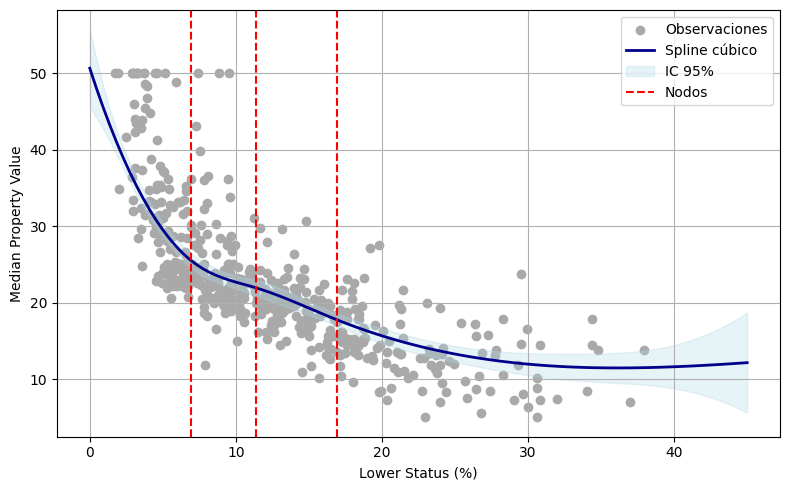

In [11]:
y_lab = 'Median Property Value'
x_lab = 'Lower Status (%)'
plt.figure(figsize=(8, 5))
plt.scatter(x, datos['medv'], c='darkgrey', label='Observaciones')
plt.plot(sort_x, pred_mean_spline, color='darkblue', linewidth=2, label='Spline cúbico')
plt.fill_between(sort_x, pred_ci_spline[:, 0], pred_ci_spline[:, 1], color='lightblue', alpha=0.3, label='IC 95%')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
for cut in cuts:
    plt.axvline(x=cut, color='red', linestyle='--', linewidth=1.5)
plt.plot([], [], color='red', linestyle='--', linewidth=1.5, label='Nodos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
summary_spline = model_spline.summary()
summary_text = summary_spline.tables[0]
print(summary_text)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 06 May 2024   Prob (F-statistic):          3.68e-121
Time:                        16:44:24   Log-Likelihood:                -1549.3
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     499   BIC:                             3142.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         


Comparación con regresión lineal:

In [13]:
model_lm = sm.OLS(datos['medv'], sm.add_constant(x)).fit()
sort_x_lm = np.linspace(0, 45, 100)
sort_x_with_intercept = sm.add_constant(sort_x_lm)
pred_lm = model_lm.get_prediction(sort_x_with_intercept)
pred_mean_lm = pred_lm.predicted_mean
pred_ci_lm = pred_lm.conf_int(alpha=0.05) 

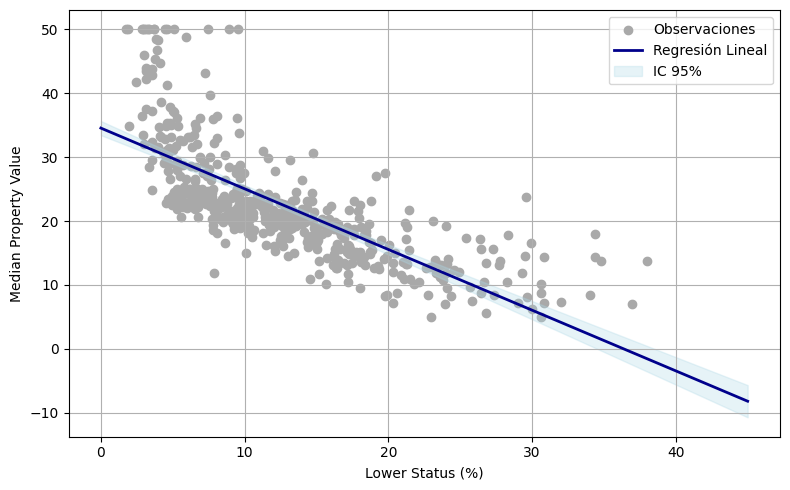

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='darkgrey', label='Observaciones')
plt.plot(sort_x, pred_mean_lm, color='darkblue', linewidth=2, label='Regresión Lineal')
plt.fill_between(sort_x, pred_ci_lm[:, 0], pred_ci_lm[:, 1], color='lightblue', alpha=0.3, label='IC 95%')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
summary_lm = model_lm.summary()
summary_lm_text = summary_lm.tables[0]
print(summary_lm_text)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.08e-88
Time:                        16:45:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
